<a href="https://colab.research.google.com/github/JohanSH7/Proyecto_BankMarketing/blob/main/EntregaN%C2%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='blue'><h1>ANÁLISIS EXPLORATORIO DE LOS DATOS  
</h1></font>



# BASE DE DATOS:   **BANK MARKETING**

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá (sí/no) un depósito a plazo (variable y).

## Importación de la base de datos


In [ ]:
!pip install ucimlrepo


In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Convert X and y into a DataFrame
df = pd.DataFrame(data=X.values, columns=X.columns)

# Add y as a new column to the DataFrame
df['target'] = y
df.rename(columns={'target': 'y'}, inplace=True)

# Print the resulting DataFrame
print(df)


      age           job   marital  education default balance housing loan  \
0      58    management   married   tertiary      no    2143     yes   no   
1      44    technician    single  secondary      no      29     yes   no   
2      33  entrepreneur   married  secondary      no       2     yes  yes   
3      47   blue-collar   married        NaN      no    1506     yes   no   
4      33           NaN    single        NaN      no       1      no   no   
...    ..           ...       ...        ...     ...     ...     ...  ...   
45206  51    technician   married   tertiary      no     825      no   no   
45207  71       retired  divorced    primary      no    1729      no   no   
45208  72       retired   married  secondary      no    5715      no   no   
45209  57   blue-collar   married  secondary      no     668      no   no   
45210  37  entrepreneur   married  secondary      no    2971      no   no   

         contact day_of_week month duration campaign pdays previous poutcom

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


## Tratamiento de datos


Según la Base de datos es necesario cambiar el valor -1 en "pdays" por Nan, ya que serían datos faltantes, dodne no se ha contactado al usuario anteriormente.

In [ ]:
import numpy as np

df["pdays"] = df["pdays"].replace(-1, np.nan)

Vemos que porcentaje de datos faltantes hay por variable con respecto al total

*   List item
*   List item

de registros.

In [ ]:
porcentaje_nan = df.isnull().mean() * 100

# Mostrar los resultados
print("Porcentaje de NaN por columna:")
print(porcentaje_nan)

Porcentaje de NaN por columna:
age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays          81.736745
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64


> *Se analiza la variable "contact"*

y                 no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509


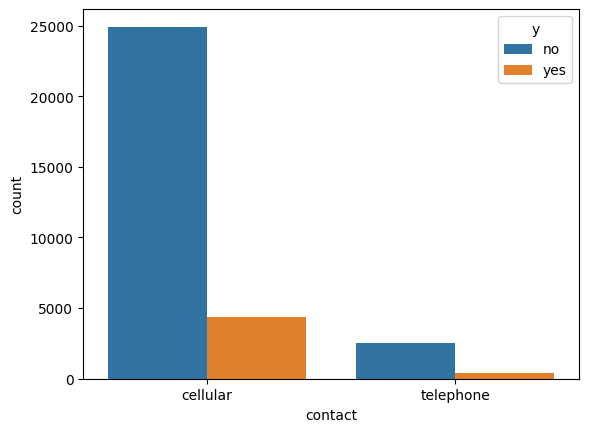

In [ ]:
import pandas as pd
import seaborn as sns


# Contar los valores de la variable categórica por cada valor de la variable booleana
tabla_frecuencia = pd.crosstab(df['contact'], df['y'])

# Graficar usando un gráfico de barras
sns.countplot(data=df, x='contact', hue='y')

result = df.groupby('contact')['y'].value_counts(normalize=True).unstack() * 100

print(result)

## Análisis y Eliminación de Variables"


Se opta por la eliminación de las variables "pdays" y "poutcome" debido a que los valores faltantes corresponden al 81% de los registros de la base de datos, lo que podría afectar significativamente el análisis debido a la falta de datos sustanciales.

Además, se decide eliminar la variable "contact" dado que el 21% de los registros de la base de datos tienen datos faltantes para esta variable. Su exclusión no se espera que tenga un impacto significativo en la variable objetivo "Y", ya que el análisis previo muestra que no hay una diferencia sustancial en la propensión a aceptar o rechazar la oferta entre aquellos que tienen solo teléfono o solo celular, lo cual se refleja en el 86% de los casos donde se menciona "no" para ambas opciones. Por lo tanto, la distinción entre tener uno u otro no parece relevante para la variable objetivo.

In [ ]:
# se eliminan las variables no representativas

df = df.drop("pdays", axis=1)
df = df.drop("poutcome", axis=1)
df = df.drop("contact", axis=1)





> *Analisis de la variable "eduaction" y "job"*



Los valores faltantes se sustituyen por "Unknown" según la fuente de la base de datos, donde se establece que el valor "NaN" representa la categoría "Unknown". Se toma la decisión de mantener estos registros en la base de datos en lugar de eliminarlos, ya que la información sobre estos casos, aunque desconocida, sigue siendo relevante para el análisis debido a que maneja la misma relación en proporción respecto a las otras categorias.

In [ ]:
df['education'].fillna('Unknown', inplace=True)
df['job'].fillna('Unknown', inplace=True)

y                 no        yes
education                      
Unknown    86.429725  13.570275
primary    91.373522   8.626478
secondary  89.440565  10.559435
tertiary   84.993610  15.006390


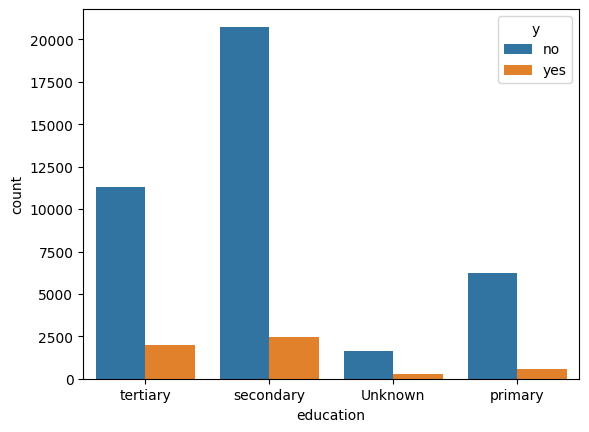

In [ ]:

# Graficar usando un gráfico de barras
sns.countplot(data=df, x='education', hue='y')

result = df.groupby('education')['y'].value_counts(normalize=True).unstack() * 100
print(result)

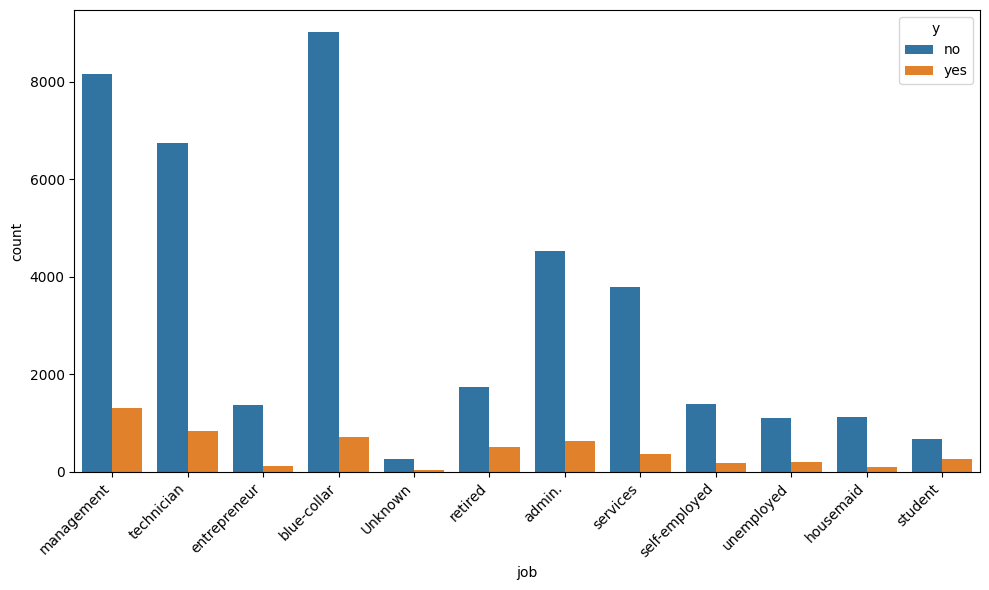

y                     no        yes
job                                
Unknown        88.194444  11.805556
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686


In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Graficar usando un gráfico de barras
sns.countplot(data=df, x='job', hue='y')

# Ajustar las propiedades del gráfico
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento

# Mostrar el gráfico
plt.show()
result = df.groupby('job')['y'].value_counts(normalize=True).unstack() * 100
print(result)

Vemos que ya no tenemos datos faltantes

In [ ]:
porcentaje_nan = df.isnull().mean() * 100

# Mostrar los resultados
print("Porcentaje de NaN por columna:")
print(porcentaje_nan)

Porcentaje de NaN por columna:
age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
balance        0.0
housing        0.0
loan           0.0
day_of_week    0.0
month          0.0
duration       0.0
campaign       0.0
previous       0.0
y              0.0
dtype: float64


##Tipado de variables: Se convierte el tipo de las variables categóricas a "category" y las variables continuas a "int64" ya que ninguna presenta punto decimal.

In [ ]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame

# Cambiar 'age' a tipo entero (Integer)
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')

# Cambiar 'job' a tipo categórico (Categorical)
df['job'] = df['job'].astype('category')

# Cambiar 'marital' a tipo categórico (Categorical)
df['marital'] = df['marital'].astype('category')

# Cambiar 'education' a tipo categórico (Categorical)
df['education'] = df['education'].astype('category')

# Cambiar 'default' a tipo booleano (Binary)
df['default'] = df['default'].astype('category')

# Cambiar 'balance' a tipo entero (Integer)
df['balance'] = pd.to_numeric(df['balance'], errors='coerce').astype('Int64')

# Cambiar 'housing' a tipo booleano (Binary)
df['housing'] = df['housing'].astype('category')

# Cambiar 'loan' a tipo booleano (Binary)
df['loan'] = df['loan'].astype('category')

# Cambiar 'day_of_week'


df['day_of_week'] = df['day_of_week'].astype('category')
# Cambiar 'month'

df['month'] = df['month'].astype('category')

# Cambiar 'duration'
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').astype('Int64')

# Cambiar 'campaign'
df['campaign'] = pd.to_numeric(df['campaign'], errors='coerce').astype('Int64')


# Cambiar 'previous'
df['previous'] = pd.to_numeric(df['previous'], errors='coerce').astype('Int64')

# Cambiar 'target'
df['y'] = df['y'].astype('category')

In [ ]:
# Imprimir los tipos de datos después de la conversión
print(df.dtypes)

age               Int64
job            category
marital        category
education      category
default        category
balance           Int64
housing        category
loan           category
day_of_week    category
month          category
duration          Int64
campaign          Int64
previous          Int64
y              category
dtype: object


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,0,no
3,47,blue-collar,married,Unknown,no,1506,yes,no,5,may,92,1,0,no
4,33,Unknown,single,Unknown,no,1,no,no,5,may,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,0,no


## Análisis de variables categóricas


Se realiza un histograma comparando las variables categóricas con la variable respuesta "y".

La tendencia de todas las categorías de las variables es tener un mayor número de registros con "no" en la variable respuesta, lo cual indica lo desbalanceada que está la base de datos.

>"job": Se observa que las personas contactadas en el banco fueron personas con puestos de blue-collar, management y technician, pero las personas que más aceptan hacer un depósito a largo plazo son las del puesto management y las menos, housemaid.

>"Marital": Esta variable muestra que el mayor número de personas contactadas está casada y son las personas que más aceptan hacer un depósito a largo plazo, mientras que las divorciadas son las que menos realizan este proceso.

>"Month": En esta variable se muestra que el mes donde más se realizan llamadas a personas es en mayo y donde menos es en diciembre. Todas las variables parecen tener la misma proporción de "si" y "no" en la variable respuesta cuando se realizan pocas llamadas durante el año. Cuando se hacen muchas llamadas pueden ser repetidas a las mismas personas, lo que aumenta el número de "no" como resultado. Esto se evidencia en la correlación gráfica de variables continuas.

>"education": Esta variable muestra que la categoría de educación "secondary" es la que más acepta un depósito a largo plazo, mientras que las proporciones en el resto de categorías permanecen similares.

>"default": La variable no está muy bien descrita en la fuente de la base de datos, solo indica si tiene un crédito en default. Se observa que si no lo tiene, tiene más probabilidad de realizar un depósito a plazo.

>"housing": Se observa que las personas que más llamaron fueron las que tenían casa propia, pero las personas sin casa propia son las que decidieron hacer un depósito a largo plazo en más ocasiones.

>"loan": Demuestra si las personas contactadas tienen un préstamo personal. Aquellas que no lo tienen son las que, en su mayoría, dicen "sí" a crear un depósito a plazo con la entidad bancaria.

>"day_of_week": No muestra ninguna tendencia importante de los datos, solo que el día 20 de cada mes parece ser cuando más llaman a las personas.

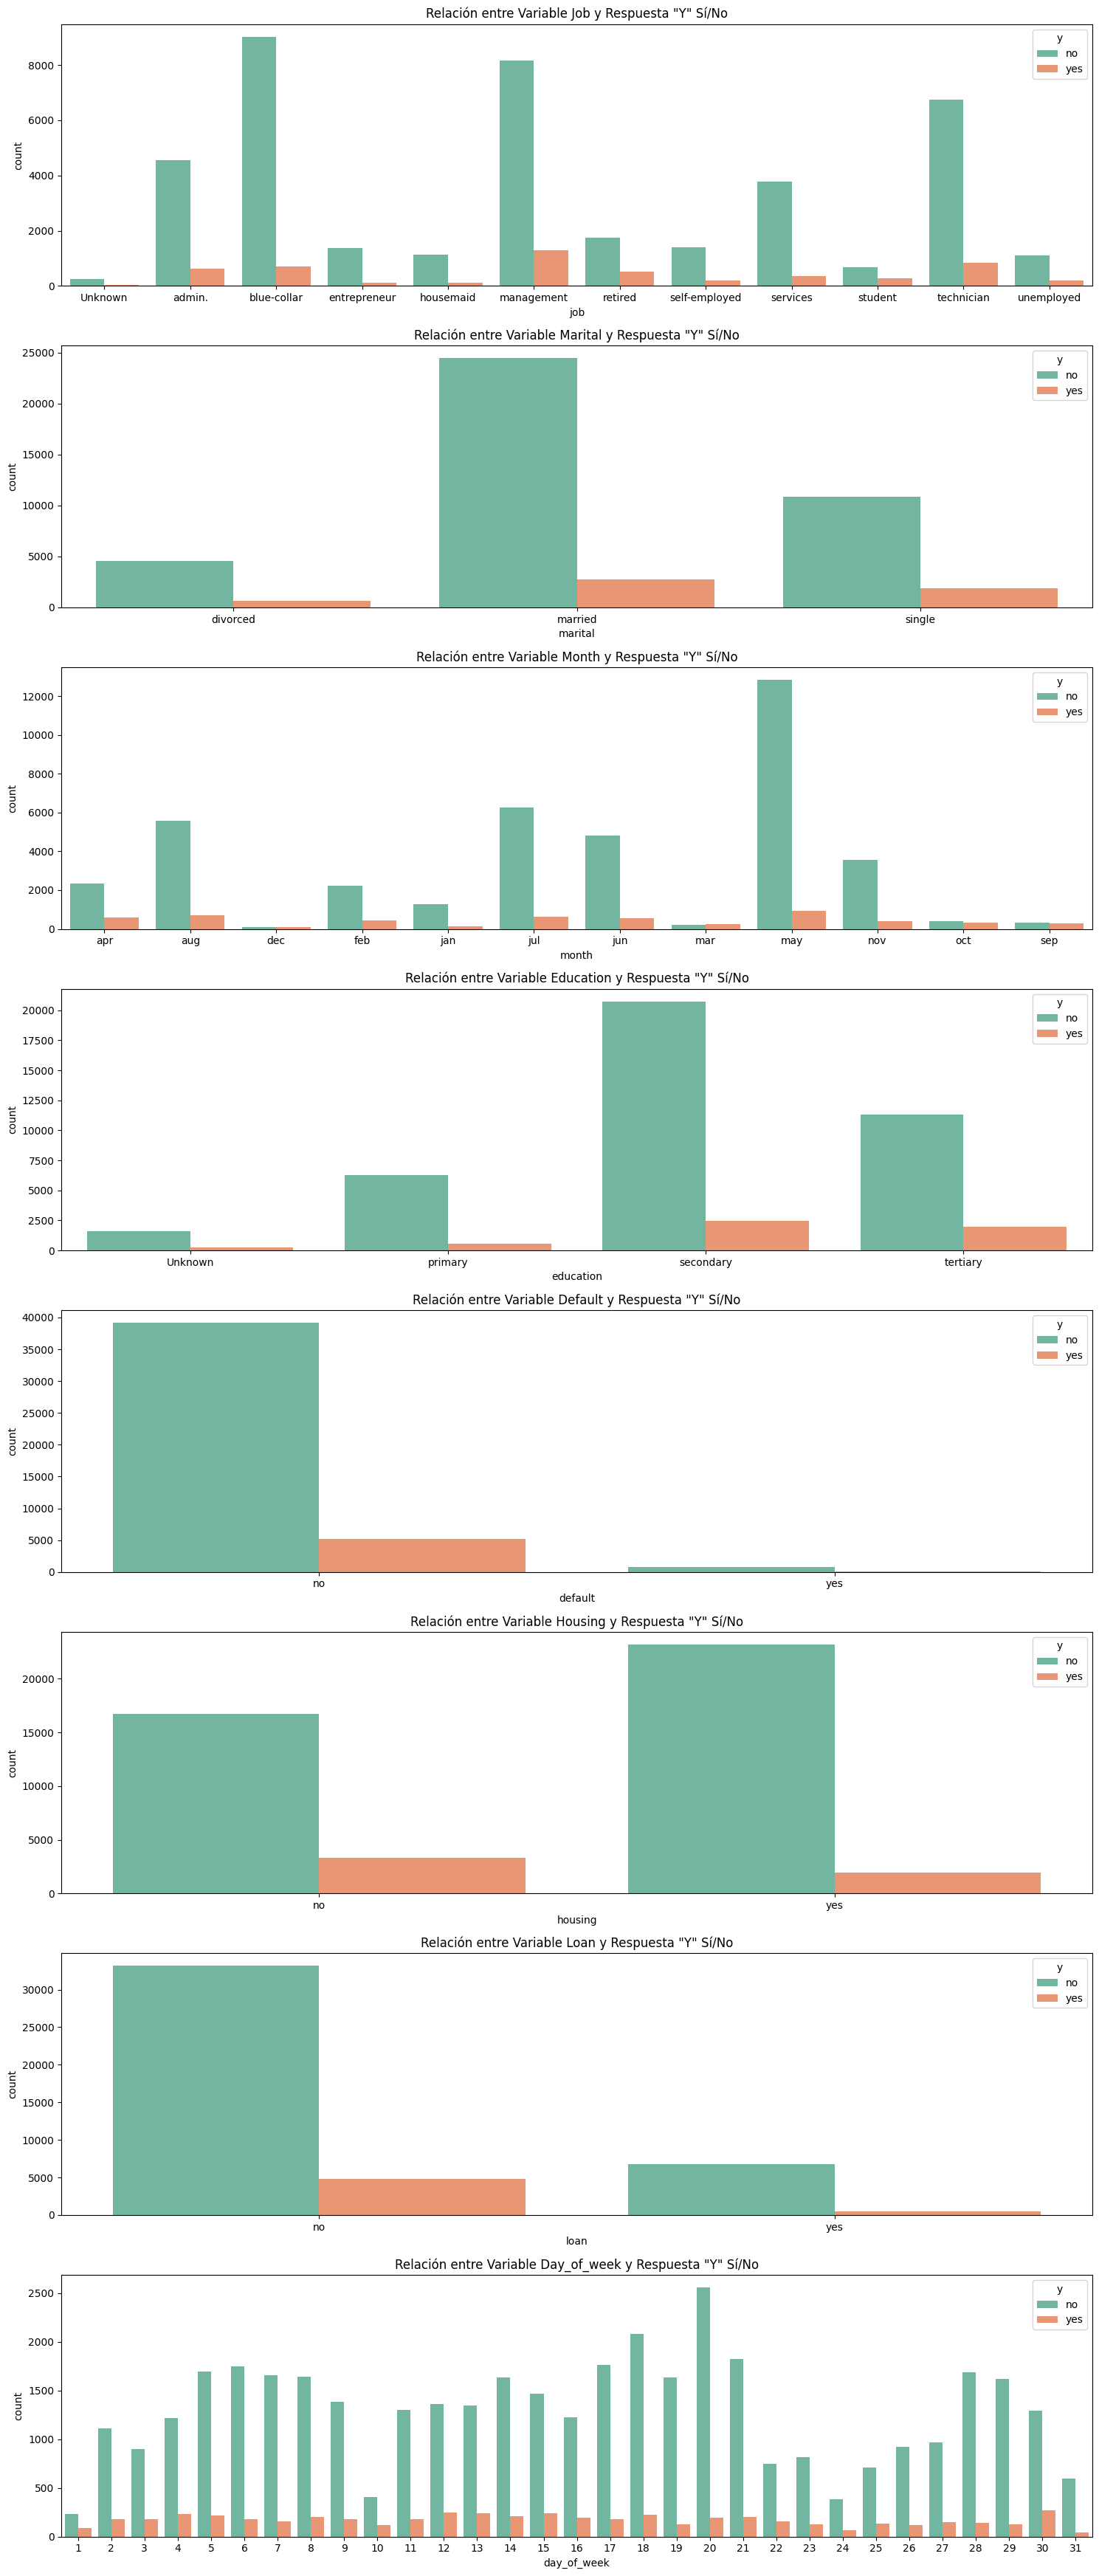

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas
categorical_variables = ['job',"marital", 'month','education', 'default',"housing", "loan", 'day_of_week']

# Ajustar tamaño de figura
plt.figure(figsize=(15, 35))

# Crear subgráficos para cada variable categórica
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(8, 1, i)
    sns.countplot(x=variable, hue='y', data=df, palette='Set2')
    plt.title(f'Relación entre Variable {variable.capitalize()} y Respuesta "Y" Sí/No')

# Ajustar diseño de subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##Análisis variables numéricas

> ***Mapa de calor*** : Se encarga de mostrar la correlación entre variables numericas, no se muestra ninguna correlación significativa entre las variables.



<ipython-input-18-7f02f797ad30>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f", annot_kws={"size": 10})


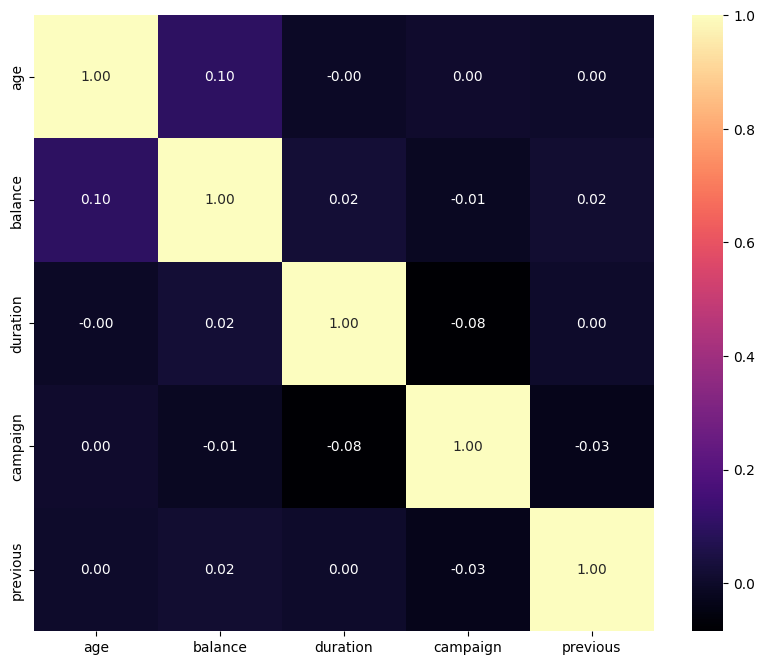

In [ ]:
plt.figure(figsize=(10, 8))

# Crear el heatmap con un tamaño de fuente más grande
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()

>Matriz de correlación:  

Las variables muestran un comportamiento similar al visto anteriormente con las variables categóricas, donde la mayoría de los valores resultan en un "no" en la variable respuesta. Por lo tanto, se procede a realizar un análisis individual de las variables y las correlaciones entre ellas.

>"age": Se observa que las personas que más piden depósitos a largo plazo son las más jóvenes, alrededor de los 20 años, y que las personas alrededor de los 60 años tienen más balance que los demás, pero suelen decir "no" a la campaña de marketing.

>"balance": Muestra el balance total en la cuenta de la persona al momento de ser contactada. Se puede observar que las personas que aceptan hacer un depósito a plazo son personas que no tienen mucho dinero en su cuenta. Además, aquellos que tienen menos depósitos son los que más tiempo pasan en las llamadas cuando se les contacta.

>"duration": Esta variable explica el tiempo en segundos de la llamada realizada. En la gráfica se muestra que las personas que más se demoran en las llamadas normalmente no aceptan hacer un depósito a plazo.

>"campaign": Es el número de veces que se llama a una persona durante la misma campaña. Se ve que las personas a las que más se llama son aquellas que tienen poco balance en la cuenta y personas alrededor de los 50 años.

>"previous": Muestra el número de veces que se llamó al cliente antes de la campaña actual. Se observa que anteriormente se llamó en promedio 50 veces a personas de todas las edades.

->> Hay valores atípicos muy dispersos, los cuales se pueden observar mejor en el boxplot en la siguiente sección.

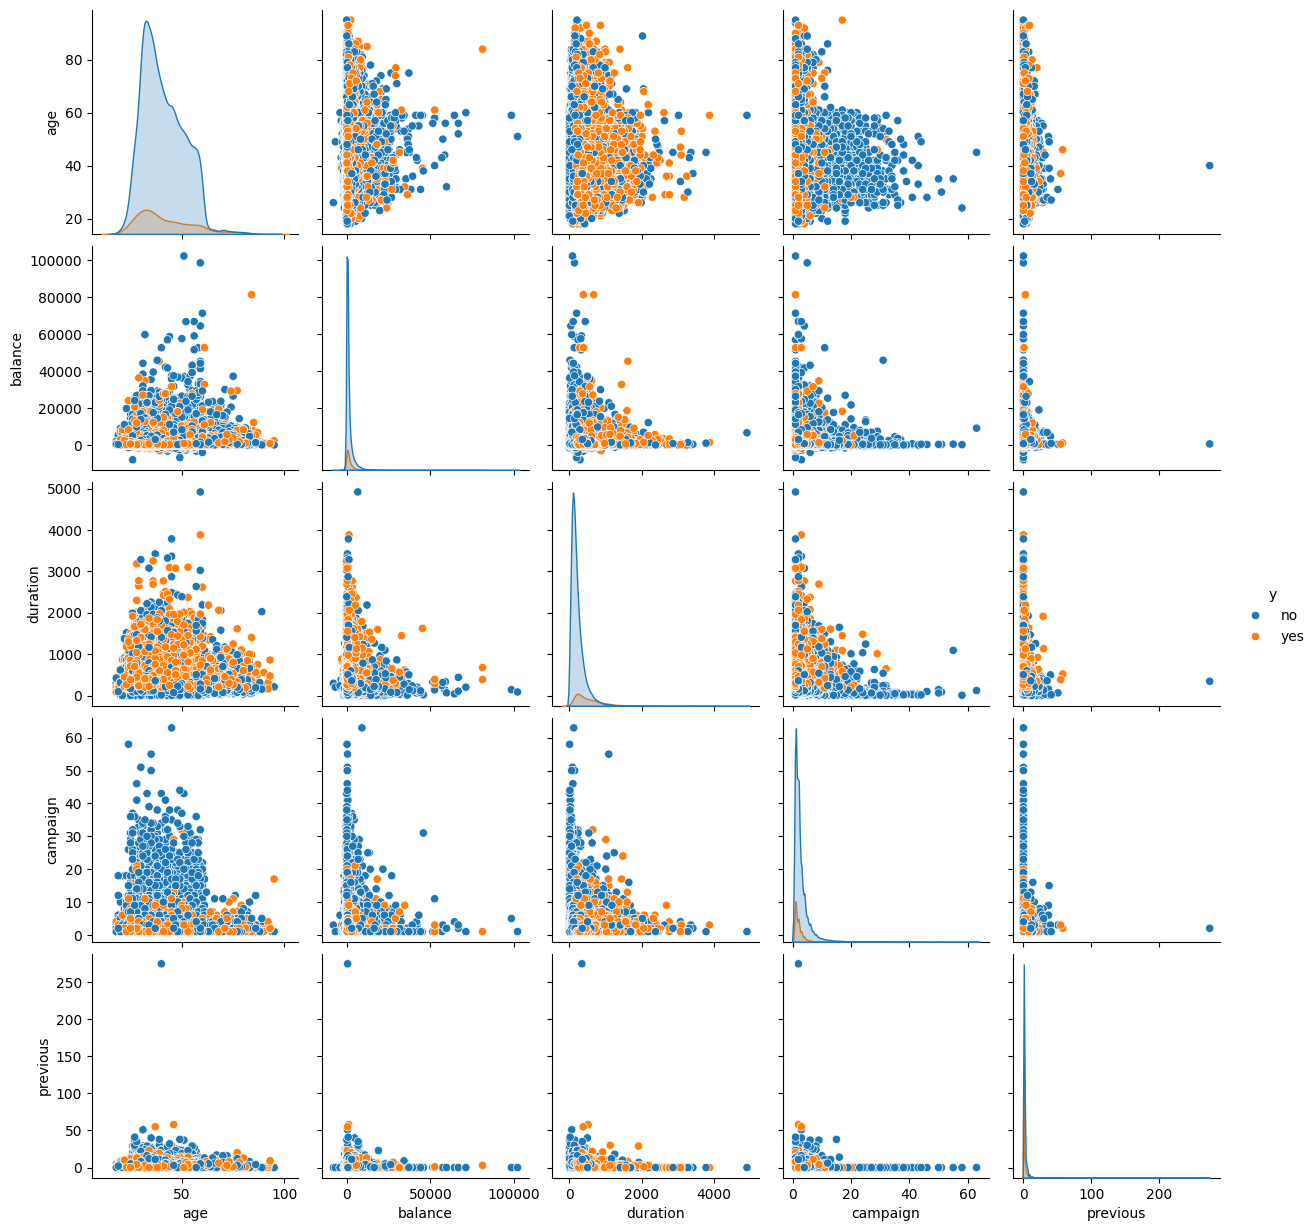

In [ ]:
sns.pairplot(df, hue='y')

In [ ]:
df.describe()

,age,balance,duration,campaign,previous
count,45211.0,45211.0,45211.0,45211.0,45211.0
mean,40.93621,1362.272058,258.16308,2.763841,0.580323
std,10.618762,3044.765829,257.527812,3.098021,2.303441
min,18.0,-8019.0,0.0,1.0,0.0
25%,33.0,72.0,103.0,1.0,0.0
50%,39.0,448.0,180.0,2.0,0.0
75%,48.0,1428.0,319.0,3.0,0.0
max,95.0,102127.0,4918.0,63.0,275.0


Todas las variables age, balance, duration, campaign y previous muestran datos atipicos, pues las cajas muestras la concentracion del 50% de los datos, y en todos los casos, hay una gran cantida de datos no solo fuera de laas cajas, si no de sus bigotes, indicando anormalidad en estos, datos
- En edad, los valores atipicos rondan entre edades de 70 a mas de 90 años
- En balance, se podrian considerar valores atipicos entre 75000$ y 100000$
- El dato atipico mas notorio en duration ocurre apartir de 4000 en adelante
- En previous hay un dato realmente alejado de los demas, siendo este mas de 250

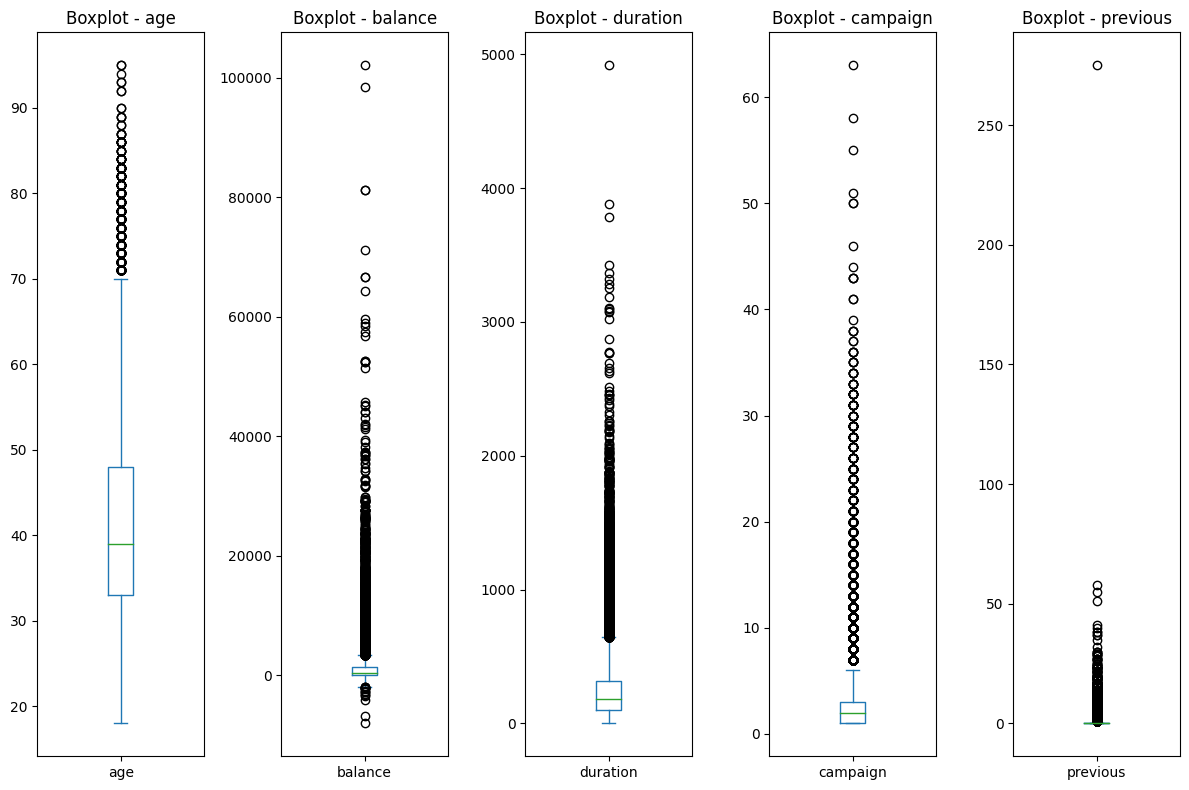

In [ ]:
# Obtén solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[float, int]).columns

# Boxplot individual para cada variable numérica
plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    plt.subplot(1, len(columnas_numericas), columnas_numericas.get_loc(columna) + 1)
    df[columna].plot(kind='box')
    plt.title(f'Boxplot - {columna}')

plt.tight_layout()
plt.show()

>Boxplot: Se observan valores atípicos en todas las variables, los cuales tienen sentido según el contexto de cada una. Por lo tanto, no se opta por eliminarlos. Solo se eliminó un registro en el cual se mostraba que una persona había recibido más de 250 llamadas.

In [ ]:
max_previous = df['previous'].max()
df= df[df['previous'] != max_previous]


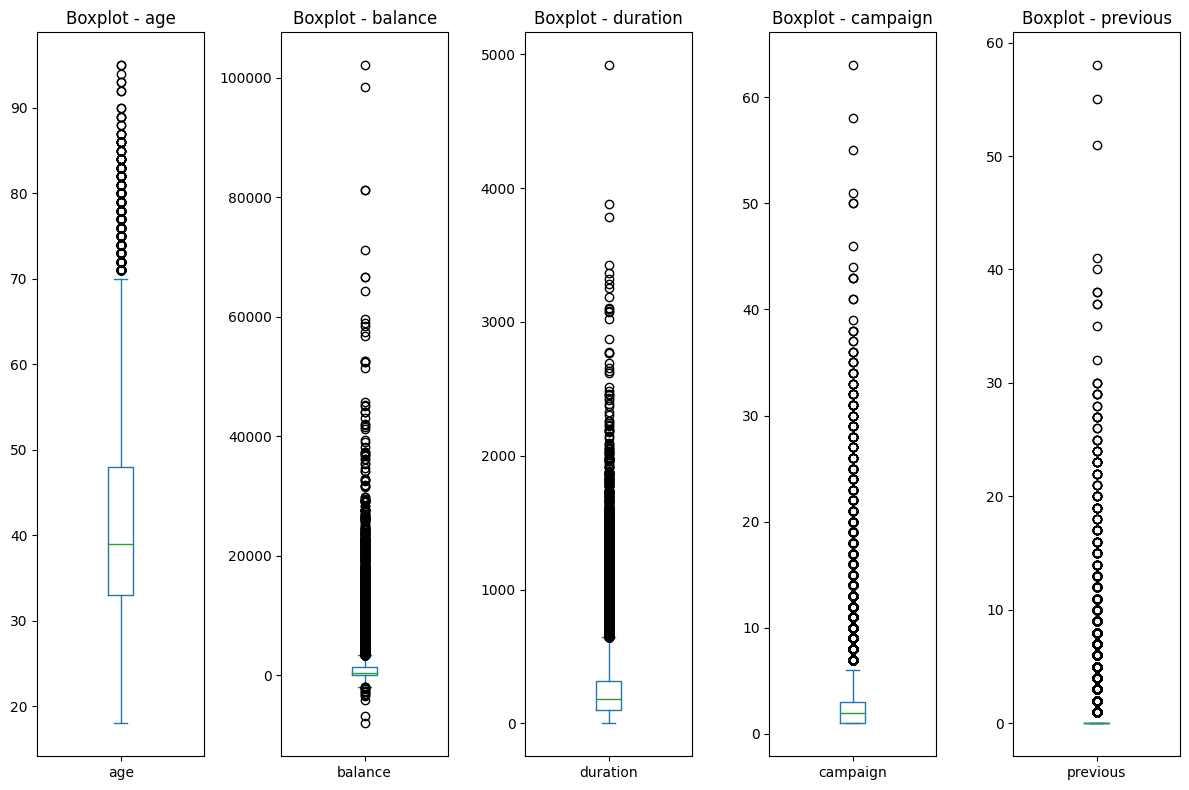

In [ ]:
# Obtén solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[float, int]).columns

# Boxplot individual para cada variable numérica
plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    plt.subplot(1, len(columnas_numericas), columnas_numericas.get_loc(columna) + 1)
    df[columna].plot(kind='box')
    plt.title(f'Boxplot - {columna}')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Guardar DataFrame como archivo CSV
df.to_csv('DATA_BANK_FILTERED.csv', index=False)

# Descargar el archivo CSV
files.download('DATA_BANK_FILTERED.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>